In [3]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [4]:
import statsmodels.api as sm

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [6]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)

In [7]:
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [8]:
A = np.array([3,5,11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


In [9]:
Boston = load_data("Boston")
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


First case: Our response variable y is Mdev and we have a single predictor lsat

In [10]:
Boston.shape

(506, 13)

In [11]:
X= pd.DataFrame({'Intercept': np.ones(Boston.shape[0]) , 'lstat': Boston['lstat']})
X.head()

,Intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [12]:
y = Boston['medv']
model= sm.OLS(y,X) #specifies the mdoel
results = model.fit() #does the actual fitting

In [13]:
summarize(results)

,coef,std err,t,P>|t|
Intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [14]:
#creating transform
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [15]:
#same as above but we combined the 2 lines 
design = MS(['lstat'])
X = design.fit_transform(Boston)
X.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           5.08e-88
Time:                        01:29:44   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
results.params #gets the coefficients column 

Intercept    34.553841
lstat        -0.950049
dtype: float64

In [18]:
new_df= pd.DataFrame({'lstat':[5,10,15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [19]:
new_predictions= results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [20]:
#confidence interval
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [21]:
#prediction interval , obs=true
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

for the same lsat value both prediction adn confidence interval of 95% are centered around the same value , in this case , about 25.05, 
but we see that the latter aka the prediction interval is wider

In [22]:
def abline(ax, b , m, *arge):
    "Add a line with a slo[pe m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m*xlim[0]+b, m * xlim[1]+b]
    ax.plot(xlim, ylim, *arge)

/tmp/ipykernel_8285/2098167770.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0],results.params[1] , 'r--');


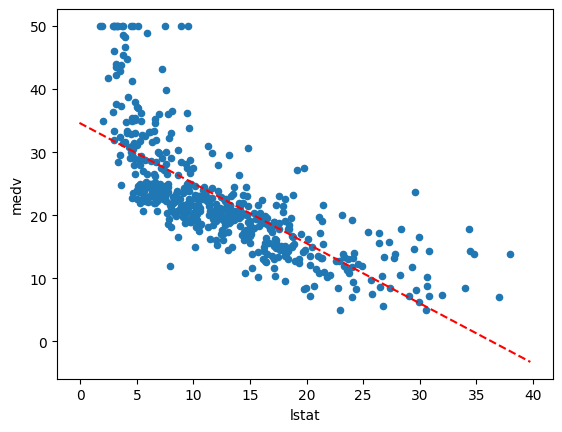

In [23]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax, results.params[0],results.params[1] , 'r--');

Diagnostic Plot 

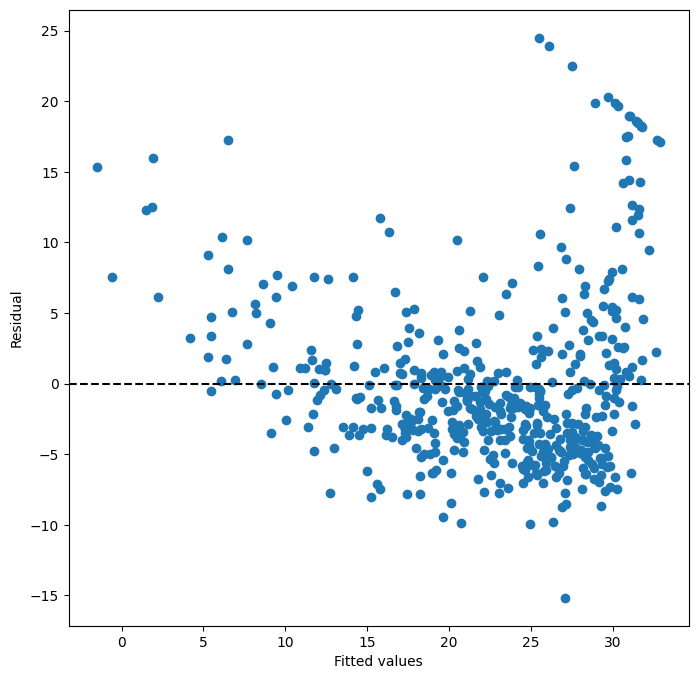

In [24]:
ax= subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residual")
ax.axhline(c="k", ls = "--");

#we can see some non linearity


 non-linearity. Leverage statistics can be computed for any number of
 predictors using the hat_matrix_diag attribute of the value returned by the
 get_influence() method.

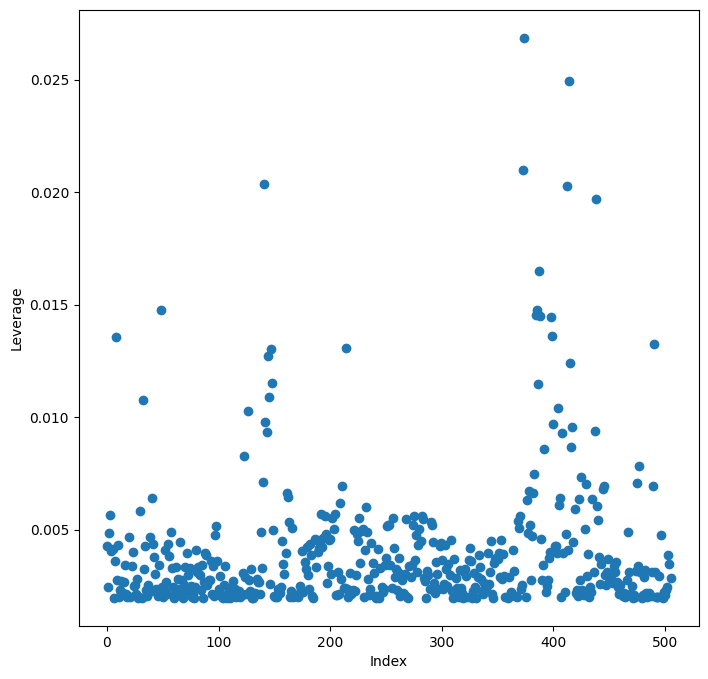

In [25]:
infl = results.get_influence()

ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag);

MULTIPLE LINEAR REGRESSION


In [26]:
X= MS(['lstat','age']).fit_transform(Boston)
modell = sm.OLS(y,X)
results1 = modell.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [27]:
#array of column names except the response variabele
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [28]:
X=MS(terms).fit_transform(Boston)
model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


MULTIVARIATE GOODNESS OF FIT

In [29]:
results.rsquared

np.float64(0.7343070437613076)

In [30]:
np.sqrt(results.scale) #RSE

np.float64(4.798034335596367)

In [31]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [32]:
vals =[]
for i in range(1, X.shape[1]):
    vals.append(VIF(X.values , i))

vals


[np.float64(1.7674859154310127),
 np.float64(2.2984589077358097),
 np.float64(3.9871806307570994),
 np.float64(1.071167773758404),
 np.float64(4.369092622844793),
 np.float64(1.9125324374368868),
 np.float64(3.0882320397311966),
 np.float64(3.954036641628298),
 np.float64(7.445300760069838),
 np.float64(9.002157663471797),
 np.float64(1.7970595931297786),
 np.float64(2.8707765008417514)]

INTERACTION TERMS

In [33]:
X = MS(['lstat','age', ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [34]:
new_terms = [("lstat", "age"), ("crim", "rm", "age")]
newt= terms.to_list() # after dropping the response var , make sure to convert the panda index to a list for model spec
print(new_terms)
fullterm = newt + new_terms
X = MS(fullterm).fit_transform(Boston)
model3 = sm.OLS(y,X)
summarize(model3.fit())

[('lstat', 'age'), ('crim', 'rm', 'age')]


,coef,std err,t,P>|t|
intercept,34.5298,5.464,6.320,0.000
crim,0.8802,0.204,4.317,0.000
zn,0.0407,0.014,2.872,0.004
indus,0.0260,0.061,0.428,0.669
chas,2.9079,0.850,3.421,0.001
nox,-17.2307,3.791,-4.545,0.000
rm,4.4380,0.447,9.919,0.000
age,0.0012,0.019,0.063,0.950
dis,-1.3508,0.199,-6.793,0.000
rad,0.2359,0.066,3.558,0.000


NON LINEAR TRANSFORMATIONS OF PREDICTORS

In [35]:
X= MS([poly("lstat", degree=2, raw=False), "age"]).fit_transform(Boston)
model = sm.OLS(y,X)
results3= model.fit()
summarize(results3)


,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


We use the anova_lm() function to further quantify the extent to which anova_lm() the quadratic fit is superior to the linear fit.

In [36]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


the annova lm performs a hypothessi test on results1 and 3 , where 1 is the normal linear fit model of lstat aand age whereas 3 is contains the quadratic term with degre 2
the null hypothesis is that the quadratic term is unneccesary while the alternative hypothesis says that quadratic model is supirior 

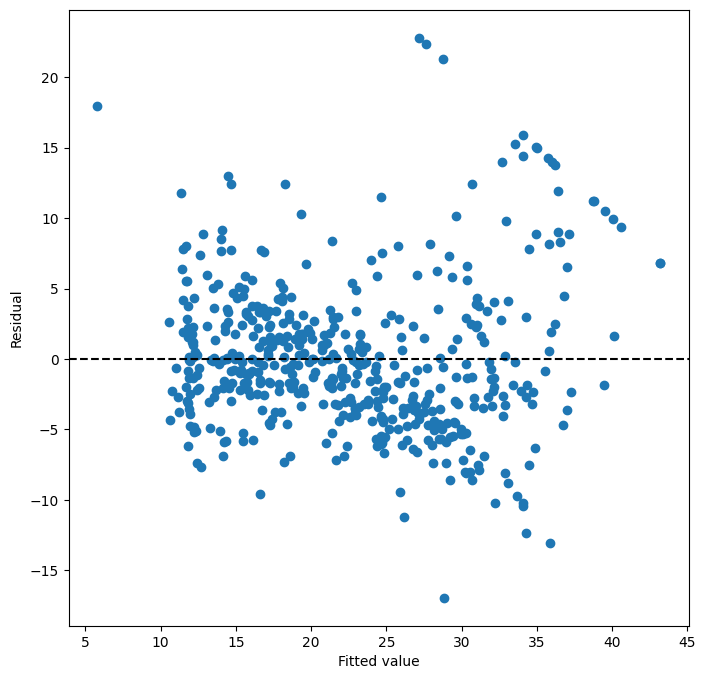

In [37]:
ax = subplots(figsize=(8,8))[1]

ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual') 
ax.axhline(0, c='k', ls='--');

Qualitative Predictors

In [38]:
Carseats = load_data('Carseats')

Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


The predictor ShelveLoc takes on
 three possible values, Bad, Medium, and Good

In [39]:
allvars= list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']#response variable
final= allvars + [('Income', 'Advertising'), ('Price', 'Age')]

X= MS(final).fit_transform(Carseats)
model = sm.OLS(y,X)
result = model.fit()
summarize(result)
#as we see new columns for categorical variables have been created automatically by Modelstat

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


Ourmodel-matrix builder has created a
ShelveLoc[Good]dummy variable that takes on a value of 1 if the shelving
location is good,and 0 otherwise. It has a l socre at ShelveLoc[Medium]
dummy variable that equals 1 if the shelving location is medium, and for shelveloc bad it is  0 otherwise

synced